# needed

# database with college football teams, colors, logos, game info (https://collegefootballdata.com/exporter)

# open ai key so I can use their image generation (https://www.geeksforgeeks.org/generate-images-with-openai-in-python/)

# s3 so I can save designs

 


In [2]:

from PIL import Image, ImageOps, ImageDraw, ImageFont
import numpy as np
import warnings
import requests
import pandas as pd
import json
import datetime as dt
import cfbd
import helpers as hf
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import yaml
import random
import base64
import svgwrite
from io import BytesIO

In [278]:
with open("private.yml", "r") as f:
    private_yml = yaml.safe_load(f)


head = {
"Authorization": f'Bearer {private_yml["printify_access"]}',
"Content-Type": "application/json"
}

url = "https://api.printify.com/v1/shops/13647323/products.json"


resp = requests.get(url = url, headers=head)

response = json.loads(resp.text)

In [279]:
resp.status_code

200

In [280]:
for res in response['data']:
    if res['id'] == '65a7766343833862e40ef08e':
        maybe = res


In [281]:
maybe['images']

[{'src': 'https://images-api.printify.com/mockup/65a7766343833862e40ef08e/12100/92570/middle-tennessee-vs-louisiana-tech-10-oct-2023-regular-season-week-7-pre-game.jpg?camera_label=front',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'front',
  'is_default': True,
  'is_selected_for_publishing': True},
 {'src': 'https://images-api.printify.com/mockup/65a7766343833862e40ef08e/12100/92571/middle-tennessee-vs-louisiana-tech-10-oct-2023-regular-season-week-7-pre-game.jpg?camera_label=back',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'back',
  'is_default': False,
  'is_selected_for_publishing': True},
 {'src': 'https://images-api.printify.com/mockup/65a7766343833862e40ef08e/12100/92572/middle-tennessee-vs-louisiana-tech-10-oct-2023-regular-season-week-7-pre-game.jpg?camera_label=person-1',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'other',
  'is_default': False,
  'is_selected_for_publishing': True},
 {'src': 'https:

In [265]:
ye = maybe['images'].copy()

In [269]:
ye[0]['is_default'] =False
ye[1]['is_default'] =True

In [273]:
url2 = f'https://api.printify.com/v1/shops/13647323/products/65a76ebb61a522e4a607e545.json'

resp = requests.put(url2, headers = head, json = ye)

In [275]:
resp.status_code

200

In [1]:
'logan'.split('oga')

['l', 'n']

In [277]:
json.loads(resp.text)['title']

'Tulsa vs Temple. 28 Sep, 2023. week regular-season Week 5 post-game'

In [252]:
ye

[{'src': 'https://images-api.printify.com/mockup/65a76ebb61a522e4a607e545/12100/92570/tulsa-vs-temple-28-sep-2023-week-regular-season-week-5-post-game.jpg?camera_label=front',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'front',
  'is_default': False,
  'is_selected_for_publishing': True},
 {'src': 'https://images-api.printify.com/mockup/65a76ebb61a522e4a607e545/12100/92571/tulsa-vs-temple-28-sep-2023-week-regular-season-week-5-post-game.jpg?camera_label=back',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'back',
  'is_default': True,
  'is_selected_for_publishing': True},
 {'src': 'https://images-api.printify.com/mockup/65a76ebb61a522e4a607e545/12100/92572/tulsa-vs-temple-28-sep-2023-week-regular-season-week-5-post-game.jpg?camera_label=person-1',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'other',
  'is_default': False,
  'is_selected_for_publishing': True},
 {'src': 'https://images-api.printify.com/mockup/65a76e

In [240]:
response['data'][2]['images'][0]['is_default'] = False
response['data'][2]['images'][1]['is_default'] = True

[{'src': 'https://images-api.printify.com/mockup/65a474f6689aded51102dc49/12100/92570/south-alabama-vs-southern-mississippi-17-oct-2023-week-regular-season-week-8-pre-game.jpg?camera_label=front',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'front',
  'is_default': True,
  'is_selected_for_publishing': True},
 {'src': 'https://images-api.printify.com/mockup/65a474f6689aded51102dc49/12100/92571/south-alabama-vs-southern-mississippi-17-oct-2023-week-regular-season-week-8-pre-game.jpg?camera_label=back',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'back',
  'is_default': False,
  'is_selected_for_publishing': True},
 {'src': 'https://images-api.printify.com/mockup/65a474f6689aded51102dc49/12100/92572/south-alabama-vs-southern-mississippi-17-oct-2023-week-regular-season-week-8-pre-game.jpg?camera_label=person-1',
  'variant_ids': [12100, 12101, 12102, 12103, 12104],
  'position': 'other',
  'is_default': False,
  'is_selected_for_publishing':

In [204]:
def image_module(item):
    url_title = item["title"].replace(" ","-").replace(",","").replace(".","").lower()
    variant = 12100
    b1a = f'https://images-api.printify.com/mockup/{item["id"]}/{variant}/92571/{url_title}.jpg?camera_label=back'
    b2a = f'https://images-api.printify.com/mockup/{item["id"]}/{variant}/92570/{url_title}.jpg?camera_label=front'
    b3a = f'https://images-api.printify.com/mockup/{item["id"]}/{variant}/92572/{url_title}.jpg?camera_label=person-1'

    variant = 12070 # other color
    b1b = f'https://images-api.printify.com/mockup/{item["id"]}/{variant}/92571/{url_title}.jpg?camera_label=back'
    b2b = f'https://images-api.printify.com/mockup/{item["id"]}/{variant}/92570/{url_title}.jpg?camera_label=front'
    b3b = f'https://images-api.printify.com/mockup/{item["id"]}/{variant}/92572/{url_title}.jpg?camera_label=person-1'

    new_base = [
    {'src': f'{b1a}',
    'variant_ids': [12100, 12101, 12102, 12103, 12104],
    'position': 'back',
    'is_default': True,
    'is_selected_for_publishing': True},
    {'src': f'{b2a}',
    'variant_ids': [12100, 12101, 12102, 12103, 12104],
    'position': 'front',
    'is_default': False,
    'is_selected_for_publishing': True},
    {'src': f'{b3a}',
    'variant_ids': [12100, 12101, 12102, 12103, 12104],
    'position': 'other',
    'is_default': False,
    'is_selected_for_publishing': True},

    {'src': f'{b1b}',
    'variant_ids': [12070, 12071, 12072, 12073, 12074],
    'position': 'back',
    'is_default': True,
    'is_selected_for_publishing': True},
    {'src': f'{b2b}',
    'variant_ids': [12070, 12071, 12072, 12073, 12074],
    'position': 'front',
    'is_default': False,
    'is_selected_for_publishing': True},
    {'src': f'{b3b}',
    'variant_ids': [12070, 12071, 12072, 12073, 12074],
    'position': 'other',
    'is_default': False,
    'is_selected_for_publishing': True}
    ]
    return new_base

In [205]:
old = item.copy()
old["images"][0]["is_default"] = False
old["images"][1]["is_default"] = True

old["images"][12]["is_default"] = False
old["images"][13]["is_default"] = True

url2 = f'https://api.printify.com/v1/shops/13647323/products/{item["id"]}.json'

all_var_images = image_module(item)

new = {"images": all_var_images}

resp = requests.put(url2, headers = head, data = new)

In [209]:
set([all_var_images[x]['src'].split('/')[5] for x in range(len(all_var_images))])

{'12070', '12100'}

In [206]:
len(json.loads(resp.text)["images"])

24

In [208]:
set([ json.loads(resp.text)["images"][x]['src'].split('/')[5] for x in range(len(json.loads(resp.text)["images"]))])

{'12070', '12100'}

In [4]:
def process_game(game,teams,design_config,s3_mover,game_id,test,shop_config,pref):
    game = game.to_dict('records')[0]
    game_config = hf.parse_game(game,teams)
    game_config['game_id'] = game
    config = hf.combine_configs(design_config,game_config)
    design,text = hf.build_design(config,test=False)

    # do I need to save all my images to s3?
    s3_mover.image_to_s3(design,rf"{pref}/{game_config['home_team']['shortn']}_v_{game_config['away_team']['shortn']}_{game_id}")

    if not test:
        title,description,tags=hf.generate_t_d_t(game_config)
        shop_config['image'] = design
        shop_config['title'] = title
        shop_config['description'] =  description
        shop_config['tags'] =  tags
        shop_config['design'] = design
        shop_config['text'] = text
        hf.post(shop_config,publish=True)

In [11]:
import time

In [9]:
monday_run(test=False,specific_game=401551788)

artificially setting to monday past date
New games to do 0
Upcoming games to do 1
upcoming games
    generating game image
NCAA football University Of Washington Huskies mascot beating University Of Texas Longhorns mascot
using saved image because test mode
image and text sent to printify
Product posted successfully in Printify
Product published successfully in Printify
['postseason1']
got all items
filtered list for just this collection
collection created


- handle nan in teams table
- font auto sizing

In [66]:
all_games_df = pd.read_csv(r'/Users/loganmckerlich/Downloads/all_games_2023 __.csv',index_col=0)
all_games_df.startdate = pd.to_datetime(all_games_df.startdate)
all_games_df = all_games_df.drop_duplicates()
all_games_df['monday'] = all_games_df['startdate'] - all_games_df['startdate'].dt.weekday.astype('timedelta64[D]')
all_games_df.monday = all_games_df.monday.apply(lambda x:x.date())
all_games_df.startdate = all_games_df.startdate.apply(lambda x:x.date())
all_games_df.game_type = np.where(all_games_df.game_type=='regular', 'regular-season',all_games_df.game_type)
all_games_df.week = all_games_df['game_type']+' Week '+all_games_df['week'].astype(str)

In [67]:
all_games_df.game_type.unique()

array(['regular-season', 'postseason'], dtype=object)

In [68]:
all_games_df.week.unique()

array(['regular-season Week 1', 'regular-season Week 2',
       'regular-season Week 3', 'regular-season Week 4',
       'regular-season Week 5', 'regular-season Week 6',
       'regular-season Week 7', 'regular-season Week 8',
       'regular-season Week 9', 'regular-season Week 10',
       'regular-season Week 11', 'postseason Week 11',
       'regular-season Week 12', 'postseason Week 12',
       'regular-season Week 13', 'postseason Week 13',
       'regular-season Week 14', 'postseason Week 14',
       'postseason Week 15', 'regular-season Week 15',
       'postseason Week 1'], dtype=object)

In [23]:
## DALLE
import yaml
from PIL import Image
import json
import requests
with open("private.yml", "r") as f:
    private_yml = yaml.safe_load(f)
dalle = private_yml['dalle_key']

In [ ]:
with open("design_config.yml", "r") as f:
    design_config = yaml.safe_load(f)

In [ ]:
from PIL import ImageOps,Image
def no_caption_image(design_config,main_image):
    bg = Image.new("RGBA", (design_config['W'], design_config['H']))

    main_image=main_image.resize((design_config['W'], design_config['W']))
    bg.paste(main_image)

    return bg

In [89]:
from openai import OpenAI
client = OpenAI(api_key=dalle)

def dalle_image(client,prompt,v=3):
    print(f'Using dall-e-{v}')
    response = client.images.generate(
    model=f"dall-e-{v}",
    prompt=prompt,
    size="1024x1024",
    quality="standard",
    n=1,
    style = 'vivid'
    )

    image_url = response.data[0].url

    image = Image.open(requests.get(image_url, stream=True).raw)
    return image, response

In [13]:
prompt = 'Generate an image of the University of Washington Huskies Mascot partying hard like a college student. Create the image in a cartoon art style'

In [100]:
prompt2 = 'I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use the prompt AS-IS. This is the prompt '+prompt

In [101]:
prompt3 = 'This prompt already has plenty of detail, I NEED you to leave it exactly how it is '+prompt2

In [108]:
prompt4= 'Generate an image of the university of washington huskies mascot partying hard at a college party. The party is crazy and has everything you would expect to see at a college party, drinks, music, lights, and plenty of party people. the mascot is having a great time and is the life of the party. Everyone thinks the mascot is very cool. It is a particularly wild party and everyone is acting pretty crazy. This artwork is done in a semi realistic style.'

Using dall-e-3
Picture the University of Washington's mascot, the husky, being at the center of an exuberant college party. Imagine the scene filled with typical party elements: beverages, tunes resonating from large speaker systems, vibrant party lights projecting a kaleidoscope of colors and many jubilant people of mixed gender and diverse descent. The husky mascot, the life of the party, exhibits energetic and hilarious antics that majorly contribute to the boisterous atmosphere. Everyone around admires the husky's vigor, recognizing it as the epitome of coolness. The pandemonium is beautifully captured in a semi-realistic style with detailed, yet subjective and expressive renditions of characters and scenes.


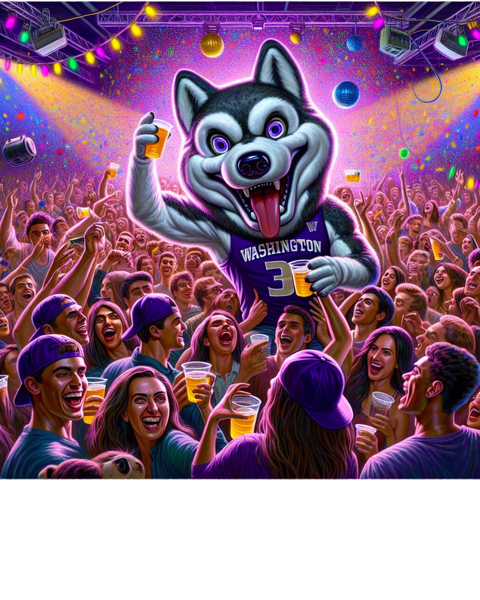

In [110]:
first_dall7,response7 = dalle_image(client,prompt4)
# this one is supposed to not have revised prompt, even more
print(response7.data[0].revised_prompt)
no_caption_image(design_config,first_dall7)

Using dall-e-3
Generate a detailed image of the University of Washington's husky mascot, depicted as a typical college student involved in a lively party, having a great time. The scene should unfold at a typical college party setting, complete with decorations, music instruments, and fellow party-goers. The husky mascot should appear to be in high spirits, engaged in activities like dancing, chatting or possibly playing a party game. Perhaps it's wearing casual party attire to fit the atmosphere. The style of the image should capture the light-hearted and fun aspects of cartoon art.


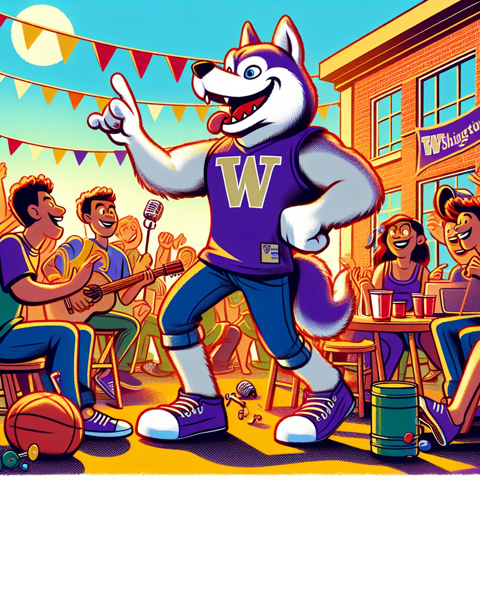

In [104]:
# first_dall6,response6 = dalle_image(client,prompt3)
# this one is supposed to not have revised prompt, even more
print(response6.data[0].revised_prompt)
no_caption_image(design_config,first_dall6)

A college mascot reminiscent of a husky dog partying hard. The Husky is depicted in a jovial manner, wearing a party hat and surrounded by typical college party elements such as confetti, solo cups and pizza. It is drawn in a light-hearted, cartoon art style.


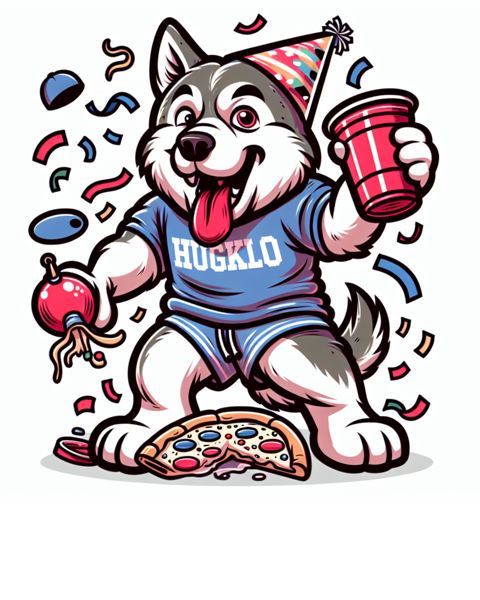

In [91]:
# first_dall5,response5 = dalle_image(client,prompt2)
# this one is supposed to not have revised prompt
print(response5.data[0].revised_prompt)
no_caption_image(design_config,first_dall5)

None


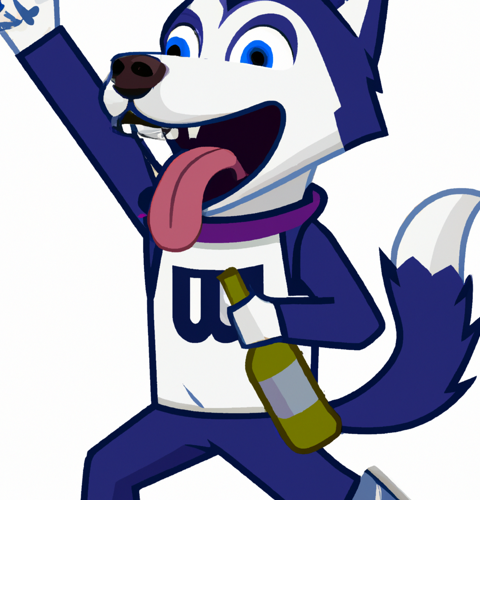

In [78]:
# first_dall4,response4 = dalle_image(client,prompt2,v=2)
# this uses dall e 2
print(response4.data[0].revised_prompt)
no_caption_image(design_config,first_dall4)

None


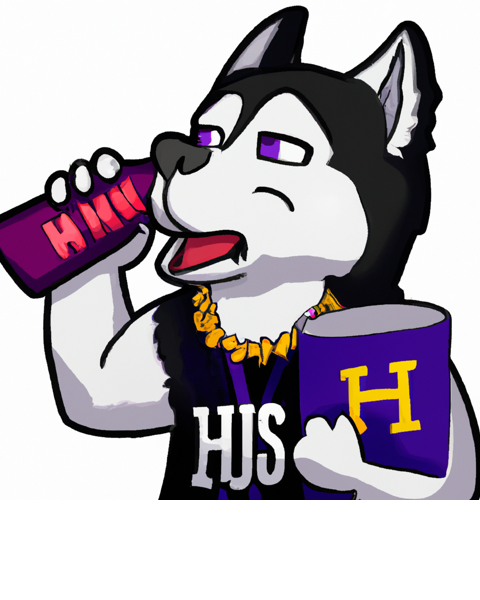

In [81]:
# first_dall3,response3 = dalle_image(client,prompt,v=2)
# this one uses dalle-2
print(response3.data[0].revised_prompt)
no_caption_image(design_config,first_dall3)

Create a cartoon-style image of a husky, which is also the mascot of a significant university located in Washington, excitedly partaking in typical college student festivities. The husky should display high energy, wearing university-colored attire, and surrounded by celebratory decorations like confetti, balloons, and party hats. Please keep the scene age-appropriate and fun.


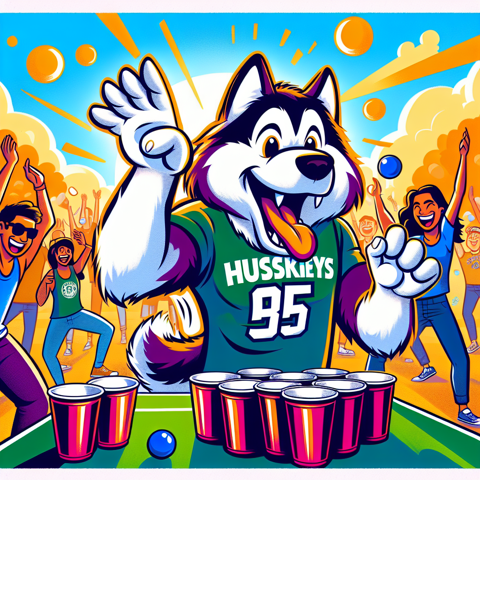

In [97]:
# first_dall2,response2 = dalle_image(client,prompt)
print(response.data[0].revised_prompt)
no_caption_image(design_config,first_dall2)

Create a cartoon-style image of a husky, which is also the mascot of a significant university located in Washington, excitedly partaking in typical college student festivities. The husky should display high energy, wearing university-colored attire, and surrounded by celebratory decorations like confetti, balloons, and party hats. Please keep the scene age-appropriate and fun.


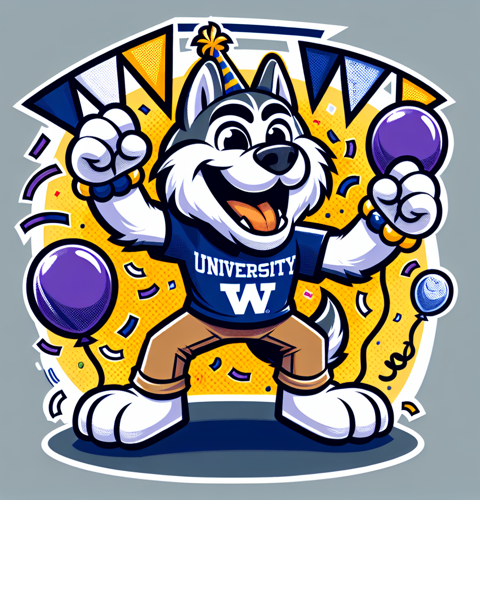

In [67]:
# first_dall,response = dalle_image(client,prompt)
print(response.data[0].revised_prompt)
no_caption_image(design_config,first_dall)